# World Happiness in 2015, 2016, and 2017

#### Analyzing the happiest countries in the world and the elements that contribute to it.

Alexander Matos 





### Introduction

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


We will examine the impact factor for increased happiness score and region based happiness investigation will show a interesting scenerio of this dataset.

# Getting Started with the Data

## Required libraries 

-  Pandas: used for data display and partitioning
-  Matplotlib - pyplot: used for plotting Pandas data into graphs and charts
-  Seaborn: provides a high-level interface for graphics on top of Matplotlib
-  scikit-learn: very popular machine learning library
    -  linear-model: used to calculate models for multiple linear regression
    -  model_selection: used to split up dataset into test and training data and evaluate predictions
-  statsmodels - api: used to calculate models and statistics with multple linear regression

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm

## Load and View Data

The three datasets which represents the World Happiness survey conducted in the years 2015, 2016, and 2017, which can found [here.](https://www.kaggle.com/unsdsn/world-happiness) 

In [6]:
import os 

d1 = pd.read_csv('2015.csv')
d2 = pd.read_csv('2016.csv')
d3 = pd.read_csv('2017.csv')

d1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
d1.info()
d1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

## Tidying and Modifying the Data

In [8]:
d1.groupby('Region')['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)'].mean().sort_values(by = 'Happiness Score', ascending= False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita)
Region,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880
North America,10.000000,7.273000,0.036960,1.360400
Western Europe,29.523810,6.689619,0.037625,1.298596
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815
Eastern Asia,64.500000,5.626167,0.037225,1.151780
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438
Southeastern Asia,81.222222,5.317444,0.042691,0.789054
Southern Asia,113.142857,4.580857,0.032161,0.560486


## Exploratory Data Analysis

#### Top 15 happiest nations in the world and their Happiness Score

[Text(0,0.5,'Happiness Score'), Text(0.5,0,'Nations')]

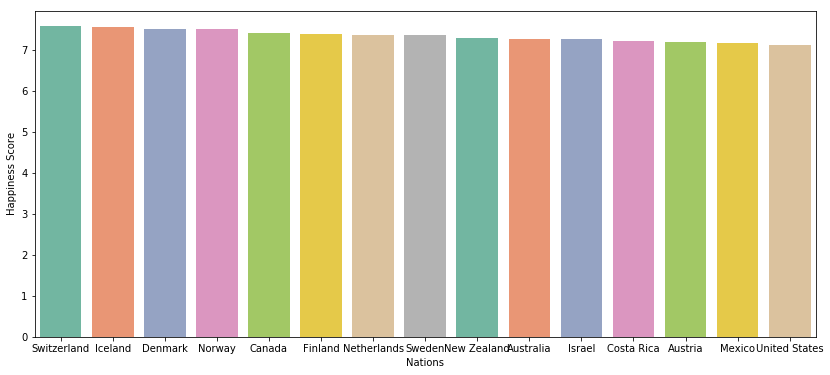

In [9]:
plt.figure(figsize=(14,6))
topFifteen = d1.sort_values(by =['Happiness Rank'], ascending = True).head(15)
ax = sns.barplot(x='Country', y = 'Happiness Score', data = topFifteen, palette = 'Set2')
ax.set(xLabel = "Nations", yLabel = "Happiness Score")

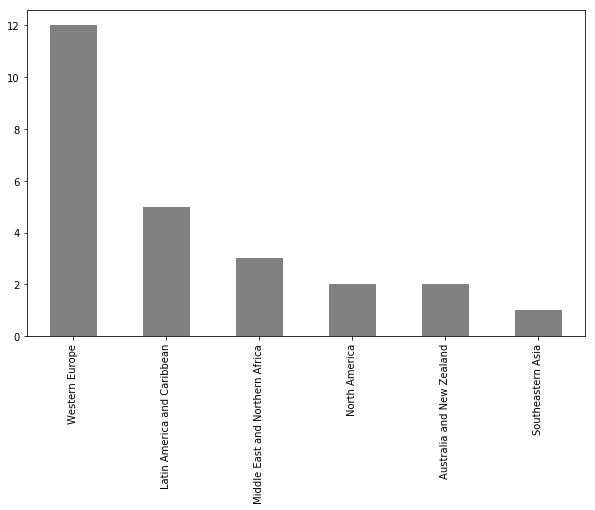

In [31]:
plt.figure(figsize = (10,6))
subset = d1.sort_values(by = ['Happiness Rank'], ascending = True)['Region'].head(25).value_counts()
subset.plot(kind = 'bar', color = 'grey')

Based on the visualization of this data, it is safe to conclude that Western Europe has the most happiest nations in the world, whereas Southeastern Asia contains the least happiest nations. All of the top 10 happiest countries are highly developed countries, and most are in Northern or Western Europe. All are rather ethnically homogenous, with strong social support networks, social democracies that defend the working class, and medicare-for-all systems. Most of the lowest-scoring countries are found in sub-Saharan Africa, North Korea, Vietnam, and China, are poor, and many have been recently ravaged by war or disease (or both).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f09c788eef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f09c76eb908>], dtype=object)

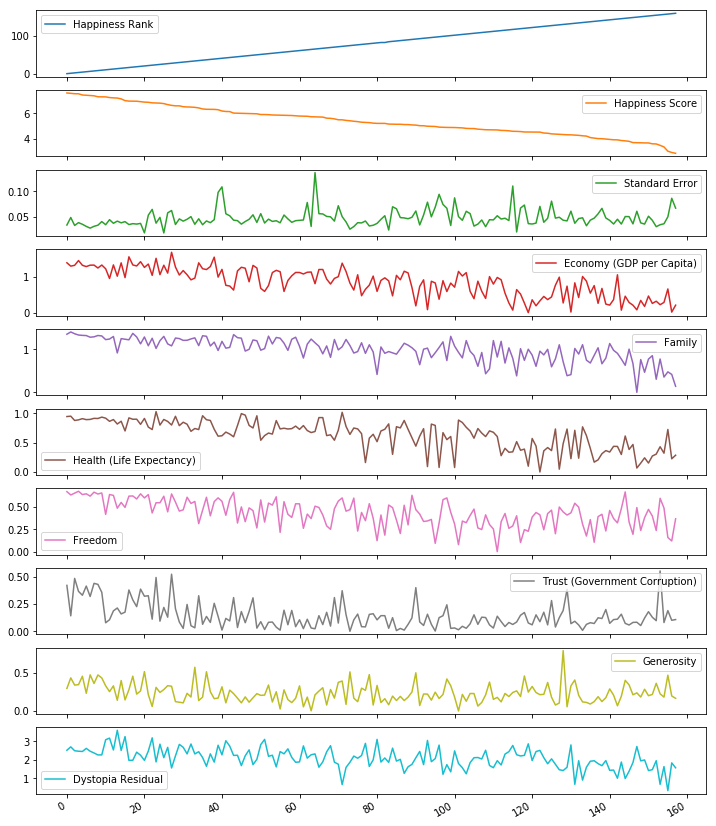

In [10]:
# Basic plotting of dataframe 

d1.plot(subplots = True, figsize = (12,16))

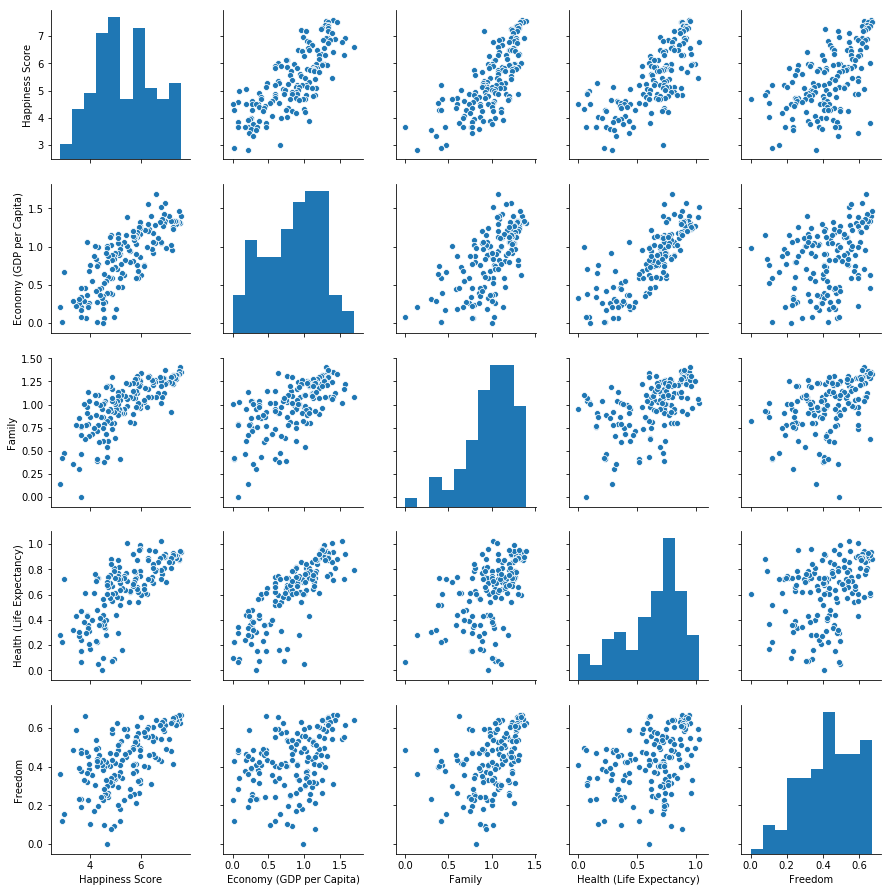

In [33]:
sns.pairplot(d1[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']])

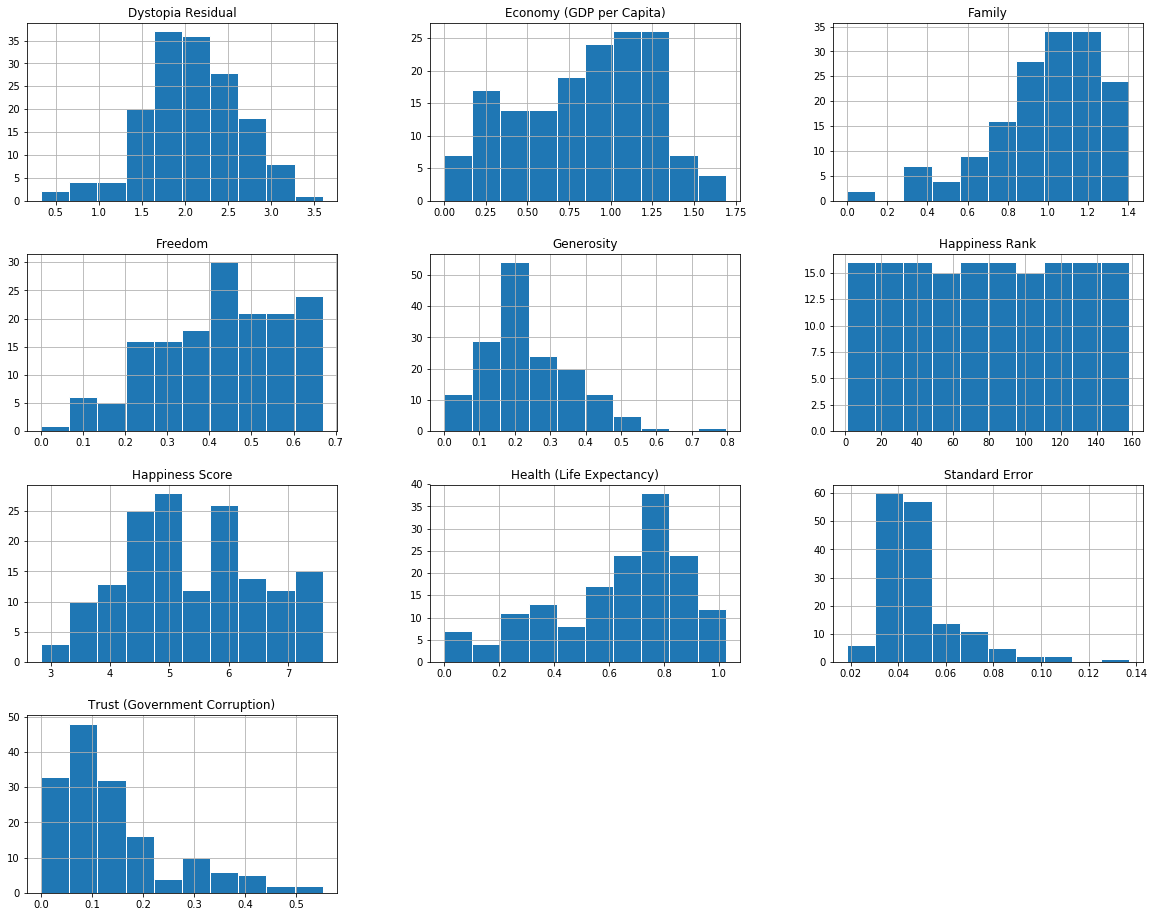

In [11]:
d1.hist(edgecolor = 'white', linewidth = 1, figsize = (20, 16))
plt.show()

#### There appears to be a strong correlation between happiness and external factors such as Economy, Family, and Health.

This correlation plot shows that the Economic GDP score tends to have the biggest impact to happiness score and the Health score has the second biggest impact.

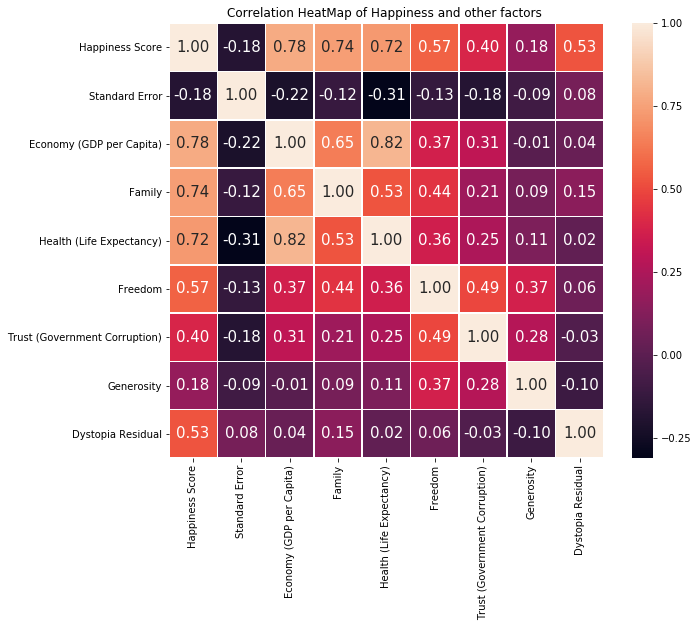

In [12]:
plt.figure(figsize = (10,8))
correlation = d1.drop(['Country', 'Region', 'Happiness Rank'], axis =1).corr()
sns.heatmap(correlation, cbar = True, square = True, annot = True, linewidths = .5, fmt = '.2f', annot_kws = {'size': 15})
plt.title('Correlation HeatMap of Happiness and other factors ')
plt.show()

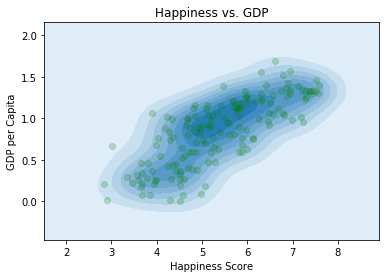

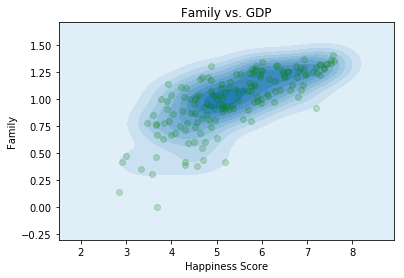

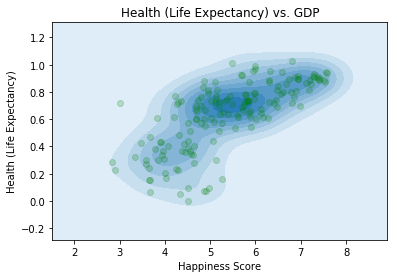

In [13]:
sns.kdeplot(d1['Happiness Score'], d1['Economy (GDP per Capita)'], shade=True)
plt.scatter(d1['Happiness Score'], d1['Economy (GDP per Capita)'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.title('Happiness vs. GDP')
plt.show()


sns.kdeplot(d1['Happiness Score'], d1['Family'], shade=True)
plt.scatter(d1['Happiness Score'], d1['Family'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.title('Family vs. GDP')
plt.show()


sns.kdeplot(d1['Happiness Score'], d1['Health (Life Expectancy)'], shade=True)
plt.scatter(d1['Happiness Score'], d1['Health (Life Expectancy)'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.title('Health (Life Expectancy) vs. GDP')
plt.show()

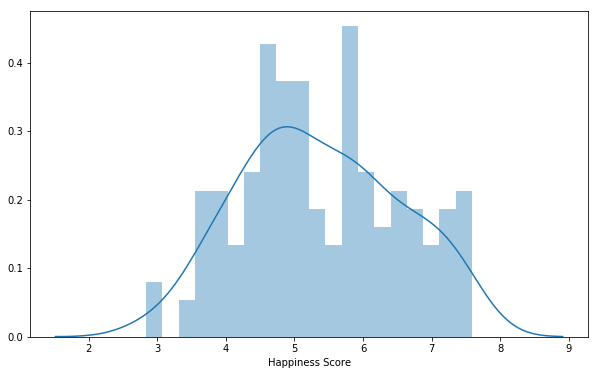

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(d1['Happiness Score'], kde= True, bins=20)
plt.show()

# Predicting Happiness (ML)

In this last section, the goal will be centered around developing a model that can accurately predict happiness levels amoung countries for the next several years. Since there are many external factors that influence overall happiness, such family, the economy (GDP per capita), and well-being, there are a variety of prediction models that could be used in this case. However, since these are many of different categories, the focus will be on linear regression. 

When fitting a model, one must split the data into a training and test set. So each time a new model is made, the data will be partitioned as such. 




In [19]:
X = d1.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis = 1)
y = d1['Happiness Score']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# Extracting a sample of the data for linear regression fitting models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 45)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Standardized features\n')
print(str(X_train[:6]))

Standardized features

[[-0.344654    1.2675513   1.22893825  1.24548901  1.55617642  2.20933384
   1.36013513  0.35088814]
 [-1.96133768  1.0979724   1.13662512  1.15207086  1.19812069  1.86141687
   1.96856414 -0.20423739]
 [ 2.43586692 -1.88761027  0.12907109 -2.30148815 -0.4679877   0.25690565
  -0.19139526  1.8203458 ]
 [-0.700514    1.20255573  1.13732476  1.09820662  1.12161305  0.93295609
  -0.19277971  0.62867557]
 [-0.9703259  -0.15336897  0.4310419  -0.26359622  0.78016111  0.24150765
   1.6833676  -0.82578628]
 [-0.11786617 -0.58671483 -0.26225882  0.09977634 -1.08903436 -0.00602992
  -0.99423009 -0.0658866 ]]


In [30]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

lr_result = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})

lr_result['Difference'] = y_test - y_pred 
lr_result.head()

,Actual,Predict,Difference
99,4.874,4.874220,-0.000220
0,7.587,7.586743,0.000257
147,3.678,3.677737,0.000263
133,4.218,4.218489,-0.000489
80,5.194,5.193815,0.000185


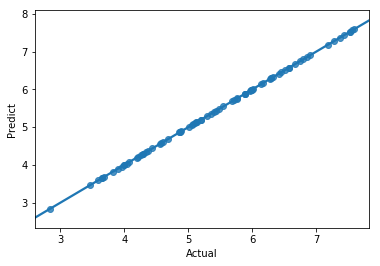

In [32]:
sns.regplot(x='Actual', y ='Predict', data= lr_result)

In [37]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 0.000257073990089
Mean Square Error: 9.26163399607e-08


In [41]:
random_regr = RandomForestRegressor()
random_regr.fit(X_train, y_train)
y_pred = random_regr.predict(X_test)

random_reg_info =  pd.DataFrame({'Actual': y_test, 'Predict': y_pred })
random_reg_info['Difference'] = y_test - y_pred

random_reg_info.head()

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Actual,Predict,Difference
99,4.874,5.9252,-1.0512
0,7.587,7.2248,0.3622
147,3.678,4.4808,-0.8028
133,4.218,4.9357,-0.7177
80,5.194,4.4235,0.7705


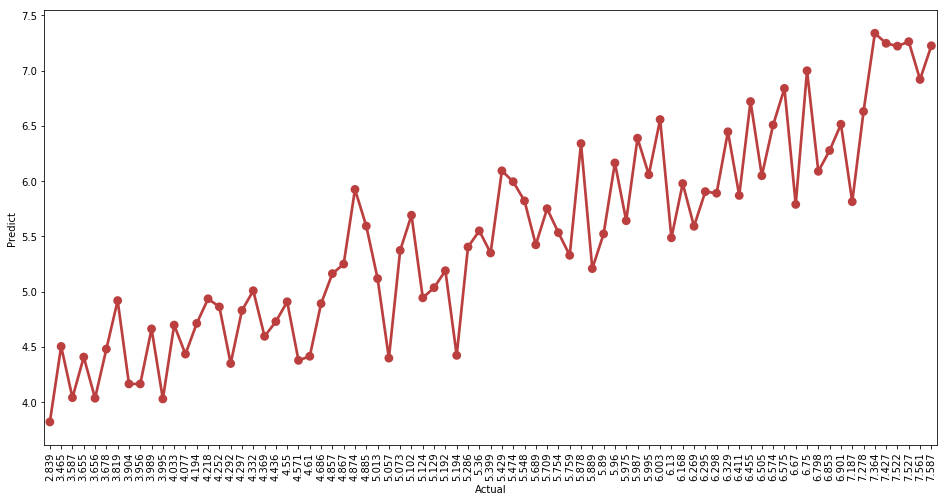

In [43]:

plt.figure (figsize = (16, 8))
sns.pointplot(x='Actual',y='Predict',data= random_reg_info, dodge = True, color="#bb3f3f")
plt.xticks(rotation = 90)
plt.show()

# Conclusion 


After analyzing the Global happinesss among nations, I measured each different factor seperately in determining “happiness.” We had also found that among the different factors, Economic GDP tends to have the greatest on happiness with Health in close second. We then decided to focus on these two by establishing graphs of their relationships to discover that there is a strong correlation between these factors.

Furthermore, I decided to explore the topic deeper by classifying certain countries in the data to the top, median and bottom 20 to 25 countries according to happines, in order to get a better sense of similarities and differences. It appeared that the “happiest” countries were located in Western Europe, particularly Scandinavia and Switzerland. Meanwhile the unfortunate countries were located in Africa, the Middle East, and Southeastern Europe. This suggests that countries in close proximity or those in the same region who reported to be almost unhappy were facing economic crisis, mass genocide, political unrest, or perpetual war.

One key observation was that Trust was the only external factor that contained the lowest scores. Countries that ultimately have high unapproval ratings for thier governments, which is illustrated in the correlation between low trust and low Freedom scores.

By looking at and analysing these reports, I was able to decide what was the important factor as well as the secondary influences that made nations and their people feel depressed. Hopefully, this report will serve as a tool to assist nations throughout the world to discover what factors they should focus on improving in order to maxmimize happiness of their citizens.